In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
texts_df = pd.read_pickle("data/processed/texts.p")
texts_reduced=texts_df[['filename','title','volume','issue','author','language','date','journal_title']]
texts_reduced=texts_reduced.drop_duplicates()
texts_reduced['topics']=texts_df['topics'][texts_reduced.index]

topics_count = pd.Series()
for topics in texts_reduced["topics"]:
    for topic in topics:
        if topic not in topics_count:
            topics_count[topic] = 1
        else:
            topics_count[topic] += 1
            
for topic in topics_count.index:
    texts_reduced[topic]=0
    
for row in range(len(texts_reduced)):
    for topic in texts_reduced['topics'].iloc[row]:
        texts_reduced.loc[texts_reduced.index[row],topic]=1
        
texts_reduced.loc[texts_reduced.journal_title=='Gazzetta urbana \t\t\t\t\t\tveneta','journal_title']='Gazzetta urbana veneta'
texts_reduced.loc[texts_reduced.journal_title=='Gazzetta urbana veneta','journal_title']='Gazzetta urbana veneta'

relevant_topics=['Theatre Literature Arts']
texts_changes=texts_reduced[['journal_title','issue','volume','topics','date']+relevant_topics]

# Spanish

In [3]:
df_topics=pd.read_csv('2020-02-25-1634_topic_keys_n5_i500_opt10.txt',sep='\t',header=None,index_col=0)
df_topics.columns=['probability','topical words']
df_topics.index.rename('Index',inplace=True)
df_topics

,probability,topical words
Index,,
0,"0,3436",gastar mayor mujer cada amar haré como princip...
1,"0,24345",hablar alegoría poesía entender ahora luego re...
2,"0,50669",mil real cierto llevar mujer servir manir quat...
3,"0,20638",san sagrado christo probar santo religion repr...
4,"0,75439",comedia comedias hallar vida tiempo propio dud...


In [4]:
df=pd.read_csv('2020-02-25-1634_doc_topics_n5_i500_opt10.txt',sep='\t',header=None,index_col=0)
df.columns=['File','0','1','2','3','4']
df.index.rename('Index',inplace=True)
df['File'] = df.File.apply(lambda x: pd.Series(str(x).split('/')[-1]))
df[['Year','Journal','Author','Title','ID','Chunk']] = df.File.apply(lambda x: pd.Series(str(x).split('_')))
df=df.drop(['Year','File','Journal','Author'],axis=1)

df_grouped=df.groupby('Title',as_index=False).mean()
df_grouped['Number'] = df_grouped.Title.apply(lambda x: pd.Series(str(x).split('-')[0]))
df_grouped=df_grouped.set_index('Number')
df_grouped.index=df_grouped.index.astype('int')
df_grouped=df_grouped.sort_index()
df_grouped

,Title,0,1,2,3,4
Number,,,,,,
0,0-Prólogo,0.001590,0.177008,0.270796,0.000955,0.549650
1,1-Discurso-Primero-dirigido-al-autor-de-las-No...,0.042741,0.038062,0.125704,0.042142,0.751351
2,2-Discurso-Segundo,0.110160,0.074383,0.140853,0.051518,0.623087
3,3-Discurso-Tercero,0.162547,0.019384,0.335083,0.029009,0.453976
4,4-Discurso-Quarto,0.062639,0.212505,0.044546,0.443001,0.237308
5,5-Discurso-Quinto,0.043848,0.186086,0.042846,0.510400,0.216821
6,6-Discurso-Sexto,0.013076,0.467143,0.077698,0.198866,0.243218
7,7-Discurso-Septimo,0.199349,0.121141,0.289219,0.008680,0.381611
8,8-Discurso-Octavo,0.336089,0.012652,0.479754,0.025603,0.145901


## Topic 1 ('hablar alegoria poesia...')

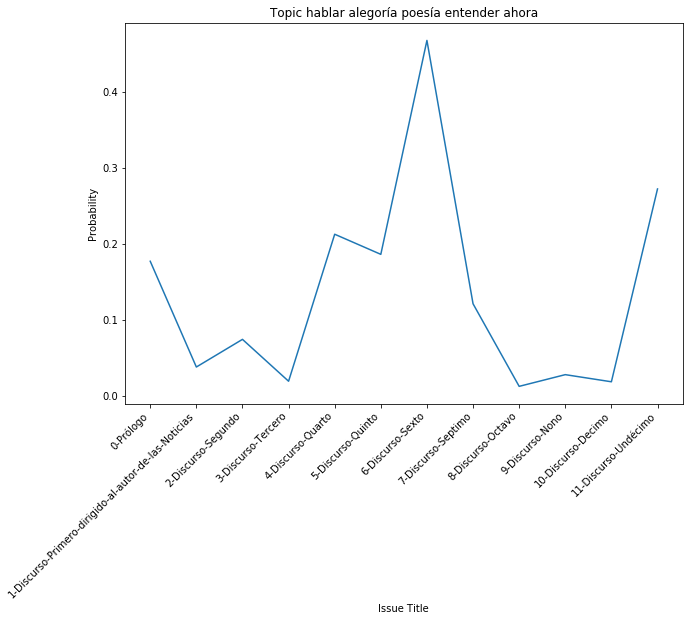

In [5]:
plt.figure(figsize=(10,7))
plt.plot(df_grouped.index,df_grouped['1'])
plt.xticks(range(len(df_grouped)), df_grouped.Title,rotation=45,ha='right')
plt.xlabel('Issue Title')
plt.ylabel('Probability')
plt.title('Topic ' + ' '.join(df_topics['topical words'][1].split(' ')[:5]))
plt.show()

## Topic 4 ("comedia comedias hallar vida...")

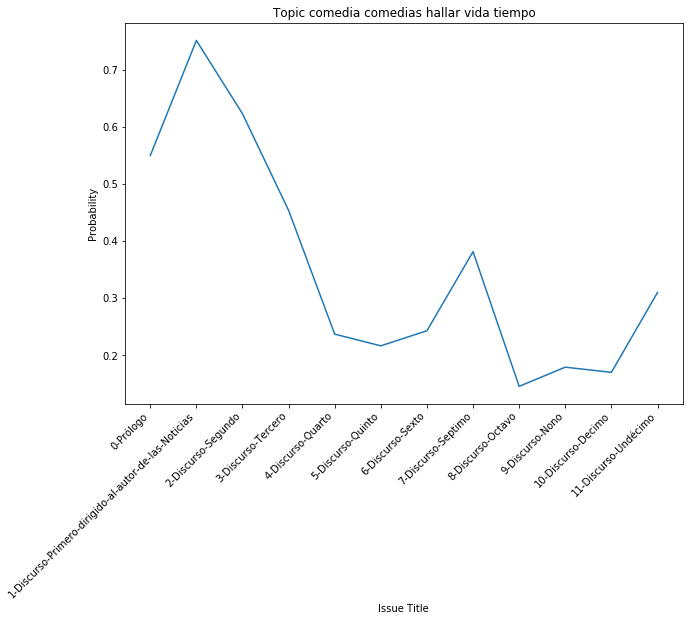

In [6]:
plt.figure(figsize=(10,7))
plt.plot(df_grouped.index,df_grouped['4'])
plt.xticks(range(len(df_grouped)), df_grouped.Title,rotation=45,ha='right')
plt.xlabel('Issue Title')
plt.ylabel('Probability')
plt.title('Topic ' + ' '.join(df_topics['topical words'][4].split(' ')[:5]))
plt.show()

In [7]:
manual_annotation=texts_changes.loc[texts_changes.journal_title=='El Escritor sin Titulo']
manual_annotation=manual_annotation.set_index('issue').sort_index()
manual_annotation.drop(manual_annotation[ manual_annotation.topics.apply(len) == 0 ].index , inplace=True)
manual_annotation

,journal_title,volume,topics,date,Theatre Literature Arts
issue,,,,,
00,El Escritor sin Titulo,1,{Autopoetical Reflection},1763,0
01,El Escritor sin Titulo,1,{Theatre Literature Arts},1763,1
02,El Escritor sin Titulo,1,{Theatre Literature Arts},1763,1
03,El Escritor sin Titulo,1,{Theatre Literature Arts},1763,1
04,El Escritor sin Titulo,1,"{Theatre Literature Arts, Religion}",1763,1
05,El Escritor sin Titulo,1,{Theatre Literature Arts},1763,1
06,El Escritor sin Titulo,1,{Theatre Literature Arts},1763,1
07,El Escritor sin Titulo,1,{Theatre Literature Arts},1763,1
08,El Escritor sin Titulo,1,"{Fashion, Image of Women}",1763,0


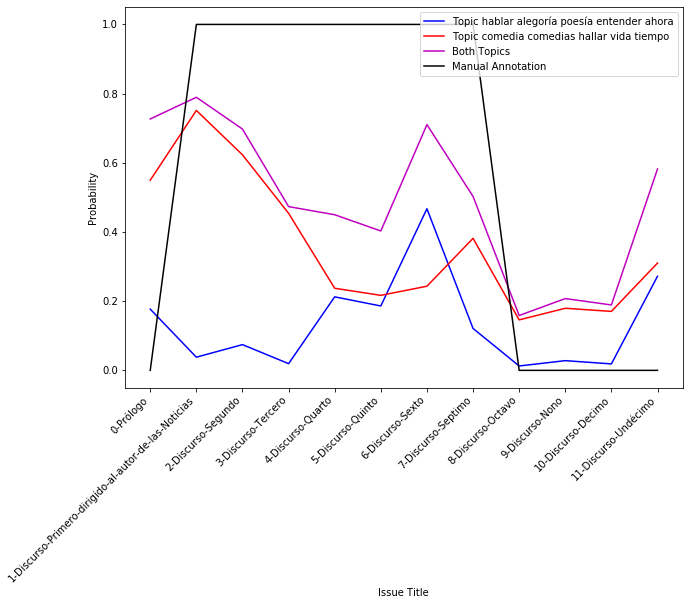

In [8]:
plt.figure(figsize=(10,7))
plt.plot(df_grouped.index,df_grouped['1'],'b')
plt.plot(df_grouped.index,df_grouped['4'],'r')
plt.plot(df_grouped.index,df_grouped['1']+df_grouped['4'],'m')
plt.plot(manual_annotation.index,manual_annotation['Theatre Literature Arts'],'k')
plt.xticks(range(len(df_grouped)), df_grouped.Title,rotation=45,ha='right')
plt.xlabel('Issue Title')
plt.ylabel('Probability')
plt.legend(['Topic ' + ' '.join(df_topics['topical words'][1].split(' ')[:5]),
            'Topic ' + ' '.join(df_topics['topical words'][4].split(' ')[:5]),
            'Both Topics',
            'Manual Annotation'])
plt.show()

# Italian

In [9]:
df_topics=pd.read_csv('2020-02-25-1541_topic_keys_n10_i1000_opt10.txt',sep='\t',header=None,index_col=0)
df_topics.columns=['probability','topical words']
df_topics.index.rename('Index',inplace=True)
df_topics

,probability,topical words
Index,,
0,"0,0507",oglio cas bot detto fag cap cai trieste cerare...
1,"0,09389",vostro dunque medico voi dopo fra ora acqua me...
2,"0,23687",opera cantare spettacolo applauso ballo musico...
3,"0,24079",chiesa san antonio giovanni marco francesco ca...
4,"0,73072",vostro noi scrivere tanto cosa mai vero tanger...
5,"0,33674",prezzo luogo tre numerare sotto quattro presen...
6,"0,1534",taglio laudo delli ecc seguire causa esso ecce...
7,"0,39299",casa sul mano andare certo trovare notte onda ...
8,"0,0899",duc cap ora librajo milano napoli roma genova ...


In [10]:
df=pd.read_csv('2020-02-25-1541_doc_topics_n10_i1000_opt10.txt',sep='\t',header=None,index_col=0)
df.columns=['File','0','1','2','3','4','5','6','7','8','9']
df.index.rename('Index',inplace=True)
df['File'] = df.File.apply(lambda x: pd.Series(str(x).split('/')[-1]))
df[['Year','Journal','Author','Title','ID','Chunk']] = df.File.apply(lambda x: pd.Series(str(x).split('_')))
df=df.drop(['File','Journal','Author'],axis=1)

df_grouped=df.groupby(['Title','Year'],as_index=False).mean()
df_grouped['Number'] = df_grouped.Title.apply(lambda x: pd.Series(str(x).split('-')[-1]))
df_grouped.loc[df_grouped.Number=='urbana','Number']=0
df_grouped.loc[df_grouped.Number=='All‘Autore','Number']=-1
df_grouped.loc[df_grouped.Number=='66a','Number']=65.5
df_grouped.Number=df_grouped.Number.astype('float')
df_grouped=df_grouped.sort_values(['Year','Number'])
df_grouped=df_grouped.reset_index()
df_grouped

,index,Title,Year,0,1,2,3,4,5,6,7,8,9,Number
0,2,Num-1,1787,0.000922,0.000333,0.207902,0.085724,0.440829,0.057032,0.002772,0.084045,0.107156,0.013285,1.0
1,49,Num-2,1787,0.406426,0.002165,0.118790,0.106496,0.160135,0.054093,0.057465,0.046097,0.018600,0.029733,2.0
2,73,Num-3,1787,0.000224,0.029001,0.145748,0.150070,0.355196,0.137488,0.047371,0.068324,0.024939,0.041638,3.0
3,95,Num-4,1787,0.000206,0.002030,0.132367,0.138485,0.193595,0.248695,0.139383,0.070308,0.015918,0.059012,4.0
4,120,Num-5,1787,0.065076,0.000375,0.066623,0.137784,0.311076,0.065053,0.000613,0.147957,0.201862,0.003581,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,11,Num-100,1790,0.139315,0.002621,0.086835,0.065793,0.162714,0.164877,0.131545,0.052517,0.063570,0.130214,100.0
239,13,Num-101,1790,0.003889,0.000353,0.181037,0.122595,0.204265,0.108283,0.264730,0.037955,0.043763,0.033131,101.0
240,15,Num-102,1790,0.146350,0.000986,0.112907,0.012493,0.226978,0.047609,0.306416,0.064770,0.021224,0.060267,102.0
241,17,Num-103,1790,0.000226,0.066445,0.192312,0.096947,0.273464,0.221732,0.041262,0.061196,0.021963,0.024452,103.0


## Topic 2 ("opera cantare spettacolo applauso...")

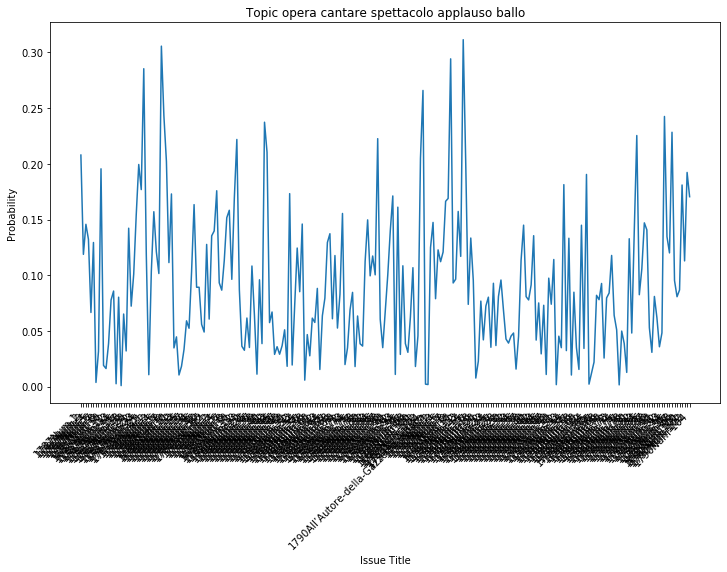

In [11]:
plt.figure(figsize=(12,7))
plt.plot(df_grouped.index,df_grouped['2'])
plt.xticks(range(len(df_grouped)), df_grouped.Year + df_grouped.Title,rotation=45,ha='right')
plt.xlabel('Issue Title')
plt.ylabel('Probability')
plt.title('Topic ' + ' '.join(df_topics['topical words'][2].split(' ')[:5]))
plt.show()

In [12]:
manual_annotation=texts_changes.loc[texts_changes.journal_title=='Gazzetta urbana veneta']
manual_annotation=manual_annotation.sort_values(['date','issue'])
manual_annotation=manual_annotation.reset_index()
manual_annotation.drop(manual_annotation[ manual_annotation.topics.apply(len) == 0 ].index , inplace=True)
manual_annotation

,index,journal_title,issue,volume,topics,date,Theatre Literature Arts
0,7243,Gazzetta urbana veneta,001,1,{Autopoetical Reflection},1787,0
1,15185,Gazzetta urbana veneta,002,1,{Italy},1787,0
2,2899,Gazzetta urbana veneta,003,1,{Autopoetical Reflection},1787,0
3,13090,Gazzetta urbana veneta,004,1,{Italy},1787,0
4,2573,Gazzetta urbana veneta,005,1,"{Love, Family}",1787,0
...,...,...,...,...,...,...,...
242,17627,Gazzetta urbana veneta,100,4,{Italy},1790,0
243,19645,Gazzetta urbana veneta,101,4,"{Science, Theatre Literature Arts}",1790,1
244,8743,Gazzetta urbana veneta,102,4,"{Science, Theatre Literature Arts}",1790,1
245,4291,Gazzetta urbana veneta,103,4,{Theatre Literature Arts},1790,1


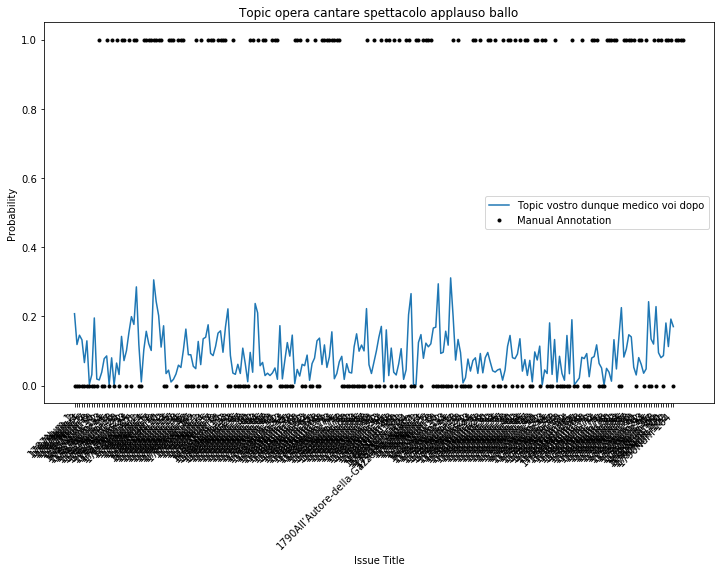

In [13]:
plt.figure(figsize=(12,7))
plt.plot(df_grouped.index,df_grouped['2'])
plt.plot(manual_annotation.index,manual_annotation['Theatre Literature Arts'],'k.')
plt.xticks(range(len(df_grouped)), df_grouped.Year + df_grouped.Title,rotation=45,ha='right')
plt.xlabel('Issue Title')
plt.ylabel('Probability')
plt.title('Topic ' + ' '.join(df_topics['topical words'][2].split(' ')[:5]))
plt.legend(['Topic ' + ' '.join(df_topics['topical words'][1].split(' ')[:5]),
            'Manual Annotation'])
plt.show()